In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load Wine Quality dataset
data = pd.read_csv('/content/winequality-red.csv')

In [3]:
# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [5]:
# Define range of max_depth values to test
max_depth_values = range(1, 11)

In [6]:
# Store train and test accuracies
train_accuracies = []
test_accuracies = []

In [7]:
# Train decision tree classifiers with different max_depth values
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Max Depth: {max_depth}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

Max Depth: 1, Train Accuracy: 0.5724713242961418, Test Accuracy: 0.5140625
Max Depth: 2, Train Accuracy: 0.5818561001042752, Test Accuracy: 0.5296875
Max Depth: 3, Train Accuracy: 0.6141814389989573, Test Accuracy: 0.565625
Max Depth: 4, Train Accuracy: 0.6590198123044838, Test Accuracy: 0.5921875
Max Depth: 5, Train Accuracy: 0.6913451511991658, Test Accuracy: 0.5625
Max Depth: 6, Train Accuracy: 0.7393117831074035, Test Accuracy: 0.5796875
Max Depth: 7, Train Accuracy: 0.786235662148071, Test Accuracy: 0.5796875
Max Depth: 8, Train Accuracy: 0.8310740354535975, Test Accuracy: 0.5671875
Max Depth: 9, Train Accuracy: 0.8706986444212722, Test Accuracy: 0.5625
Max Depth: 10, Train Accuracy: 0.9040667361835245, Test Accuracy: 0.56875


In [8]:
# Predict on the test set
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.10      0.11        21
           5       0.66      0.64      0.65       264
           6       0.56      0.60      0.58       261
           7       0.44      0.43      0.43        86
           8       0.00      0.00      0.00         6

    accuracy                           0.57       640
   macro avg       0.30      0.29      0.30       640
weighted avg       0.56      0.57      0.56       640



In [9]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print('Accuracy of Decision Tree-Train: ', accuracy_train)
print('Accuracy of Decision Tree-Test: ', accuracy_test)

print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred_test).sum()))

Accuracy of Decision Tree-Train:  0.9040667361835245
Accuracy of Decision Tree-Test:  0.56875
Number of mislabeled points out of a total 640 points: 276


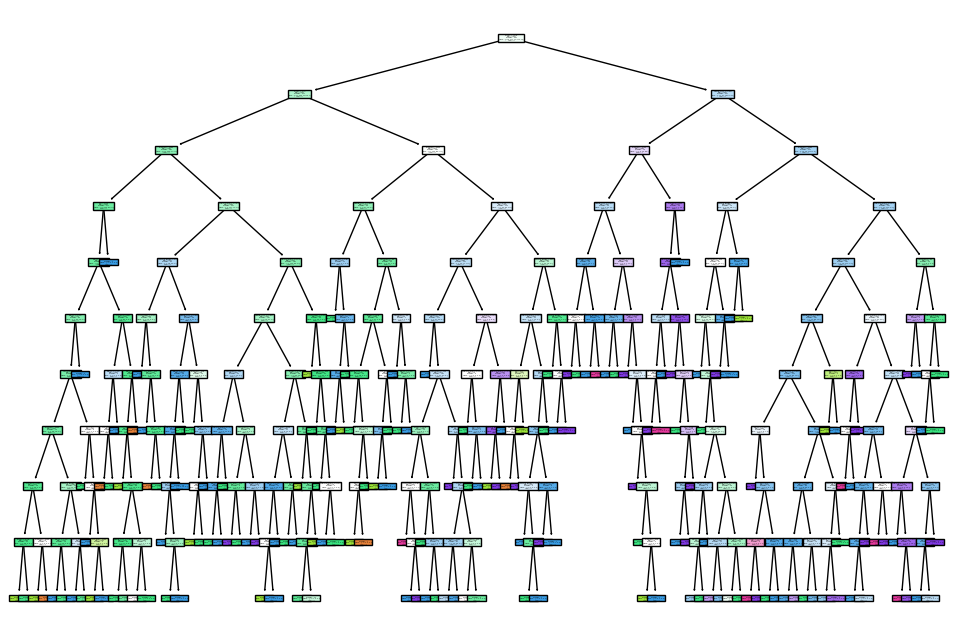

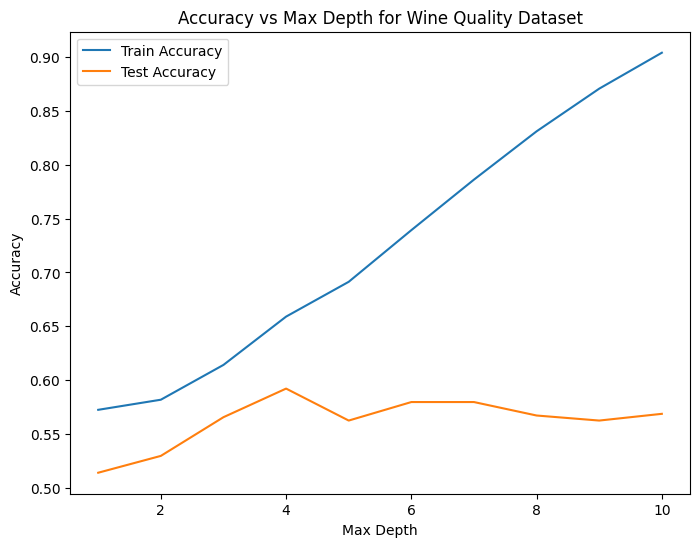

In [10]:
# Display the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in np.unique(y)], filled=True)
plt.show()

# Plot train and test accuracies vs max_depth values
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_accuracies, label='Train Accuracy')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Wine Quality Dataset')
plt.legend()
plt.show()